In [1]:
from importlib import reload
import article
reload(article)
from article import *

import warnings
warnings.simplefilter("ignore")

torch.device("cuda" if torch.cuda.is_available() else "cpu")

2024-10-23 23:05:48.026138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:05:48.080093: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:05:48.080941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 23:05:49.324120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


device(type='cpu')

# Geometric Shapes Dataset

- Dataset: https://www.kaggle.com/datasets/dineshpiyasamara/geometric-shapes-dataset/data
- Code: https://www.kaggle.com/code/dukiee/nh-m-13 (60%)

## Data loading

In [2]:
%%time
X_train, y_train, X_val, y_val, X_test, y_test = load_geometric_shapes()

CPU times: user 46.4 s, sys: 7.24 s, total: 53.6 s
Wall time: 52.2 s


Images of Triangle:


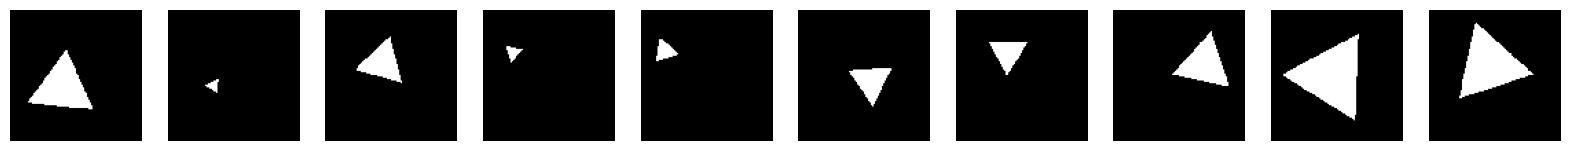

Images of Square:


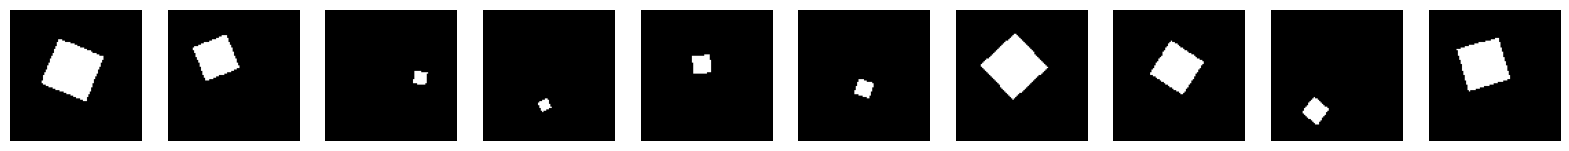

Images of Circle:


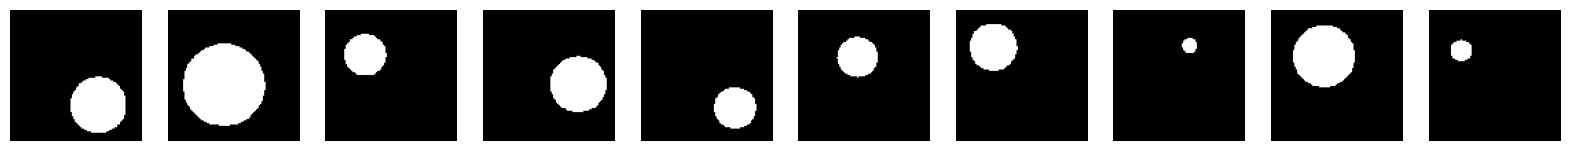

In [3]:
train_loader, val_loader, test_loader = geometric_shapes_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test, plot=True)

## Convolutional Variational Autoencoders

### Classic VAE

Number of parameters: 419001
Model loaded from Models/GeometricShapes/classic.pth


<IPython.core.display.Latex object>

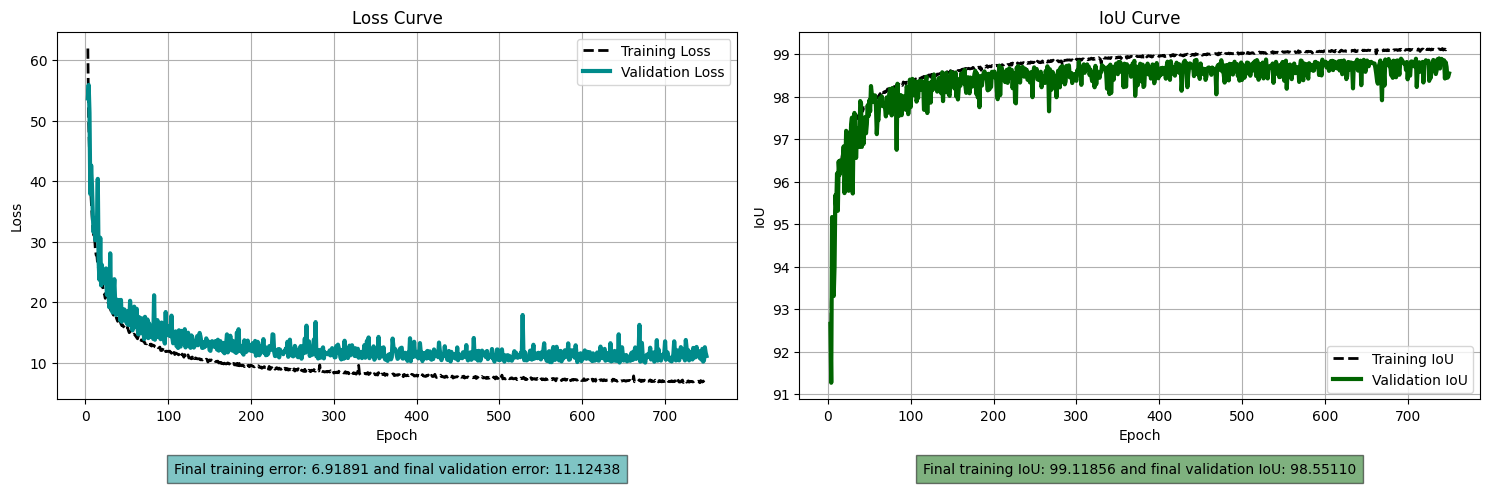

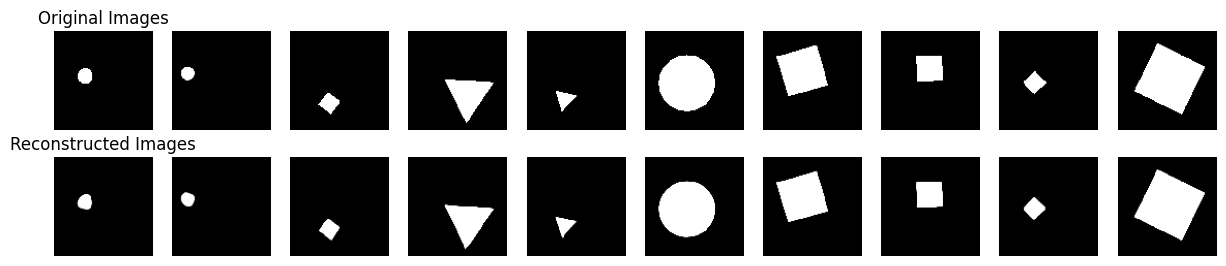

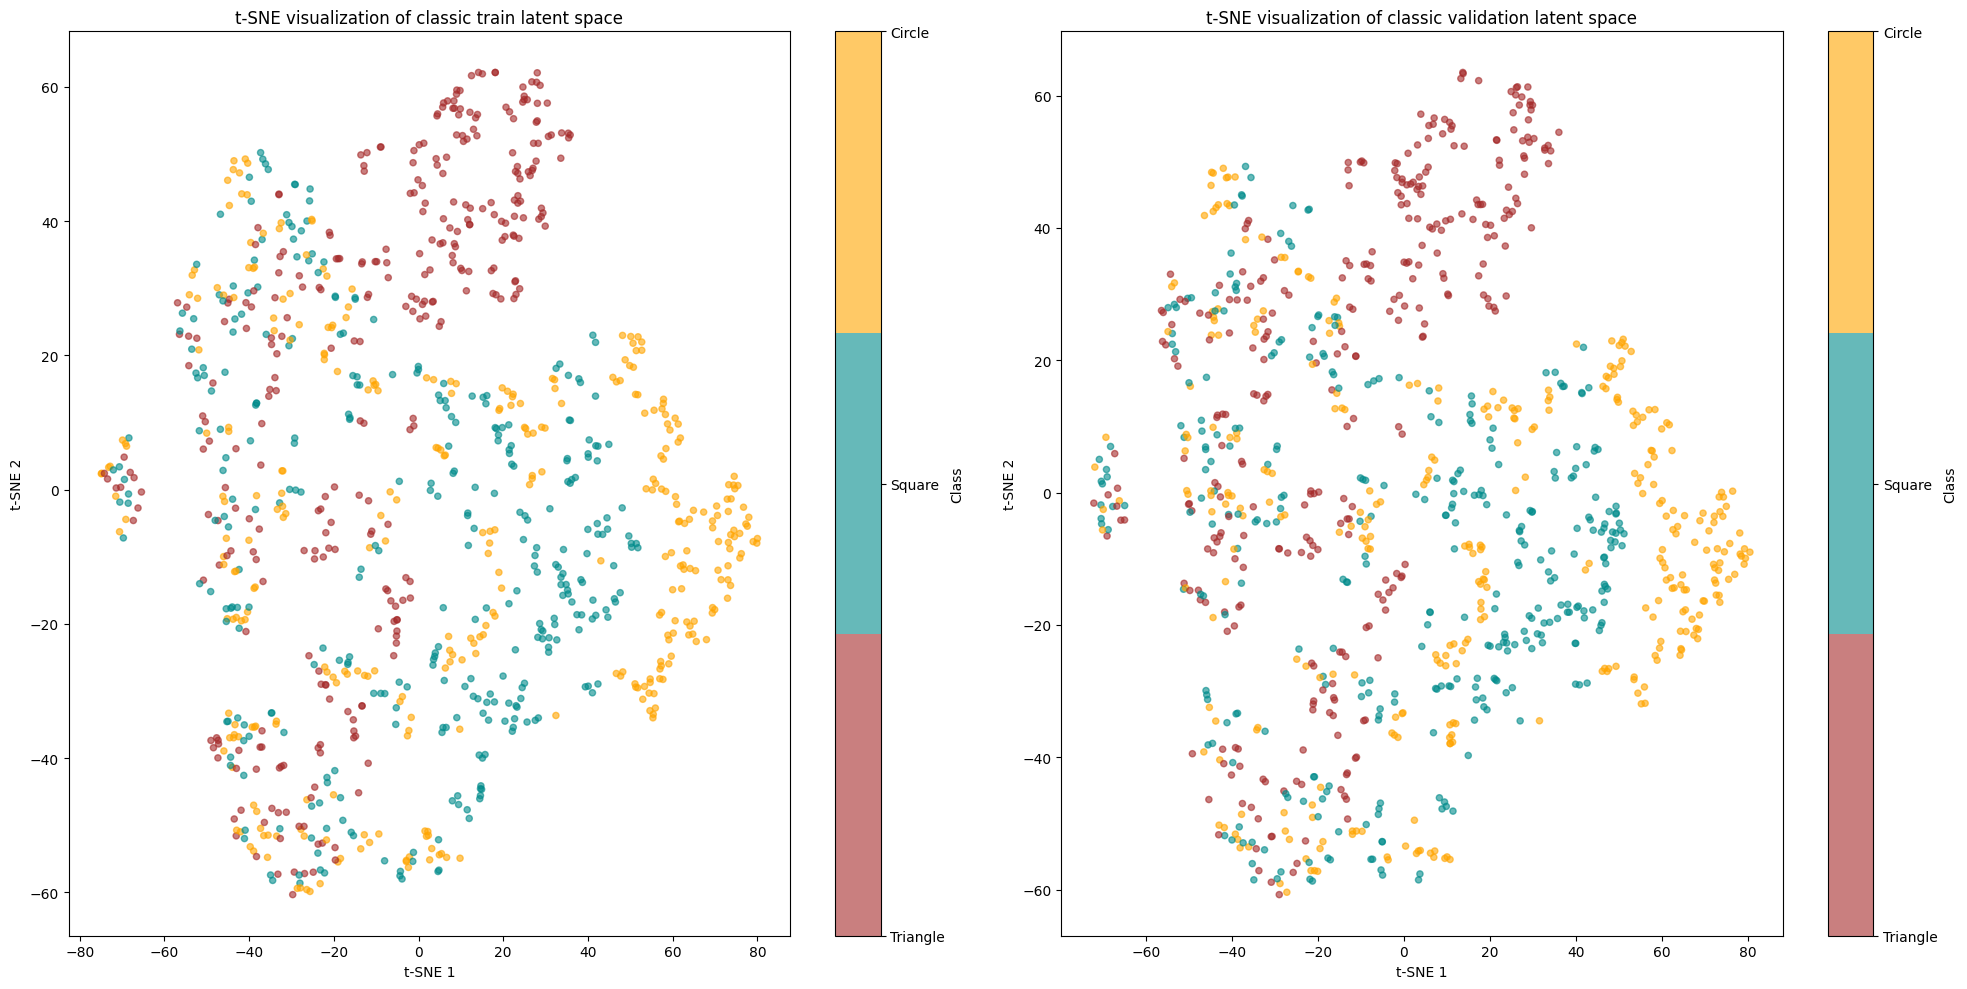

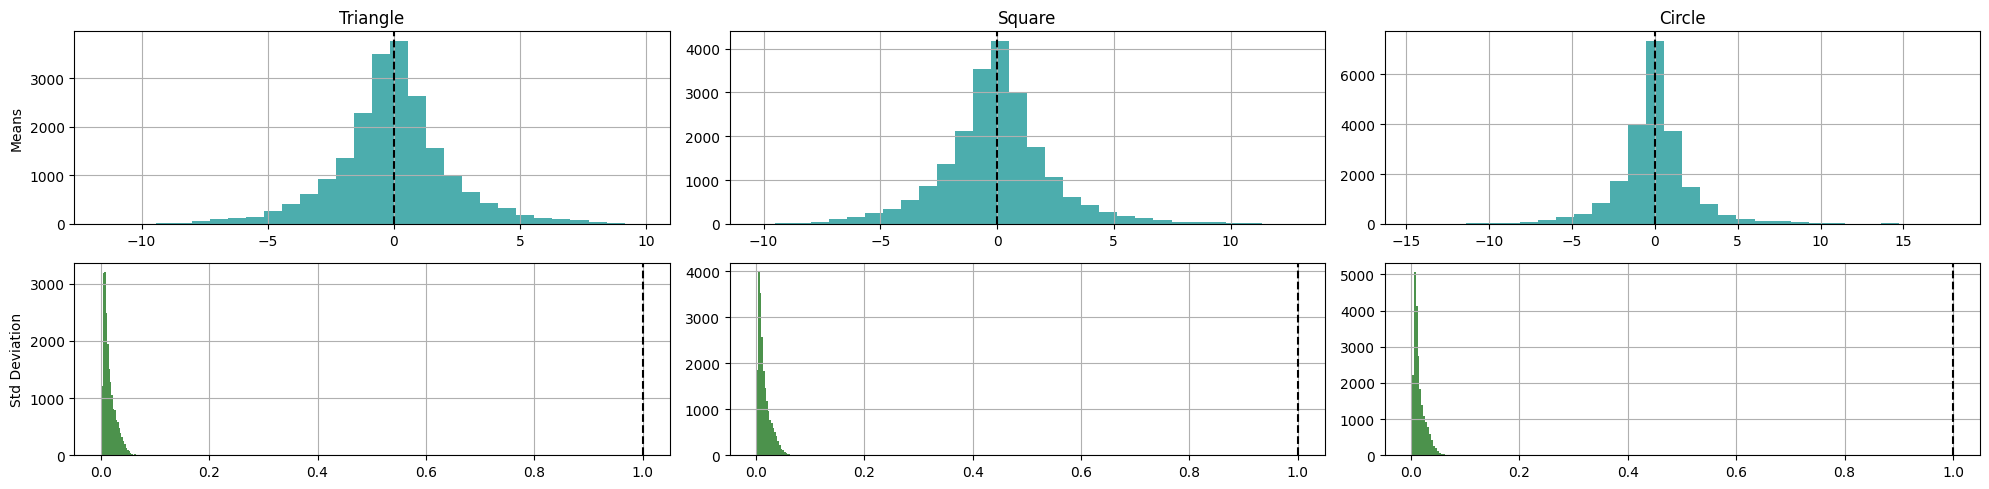

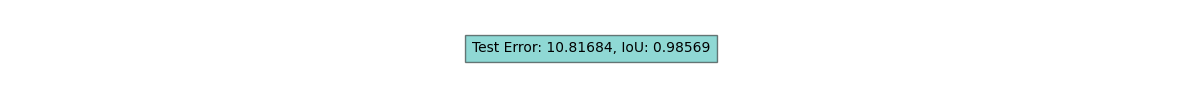

CPU times: user 1min 5s, sys: 999 ms, total: 1min 6s
Wall time: 50.1 s


In [4]:
%%time
set_seed()
vae1 = Classic_Geometric_VAE(train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
print(f"Number of parameters: {vae1.count_parameters()}")
vae1.load_and_plot('Models/GeometricShapes/classic.pth', train_loader, val_loader) # coef=10**-3
vae1.test(test_loader, coef=0)

### VAE-NTD

Number of parameters: 357640 (-14.64%)
Model loaded from Models/GeometricShapes/ntd.pth


<IPython.core.display.Latex object>

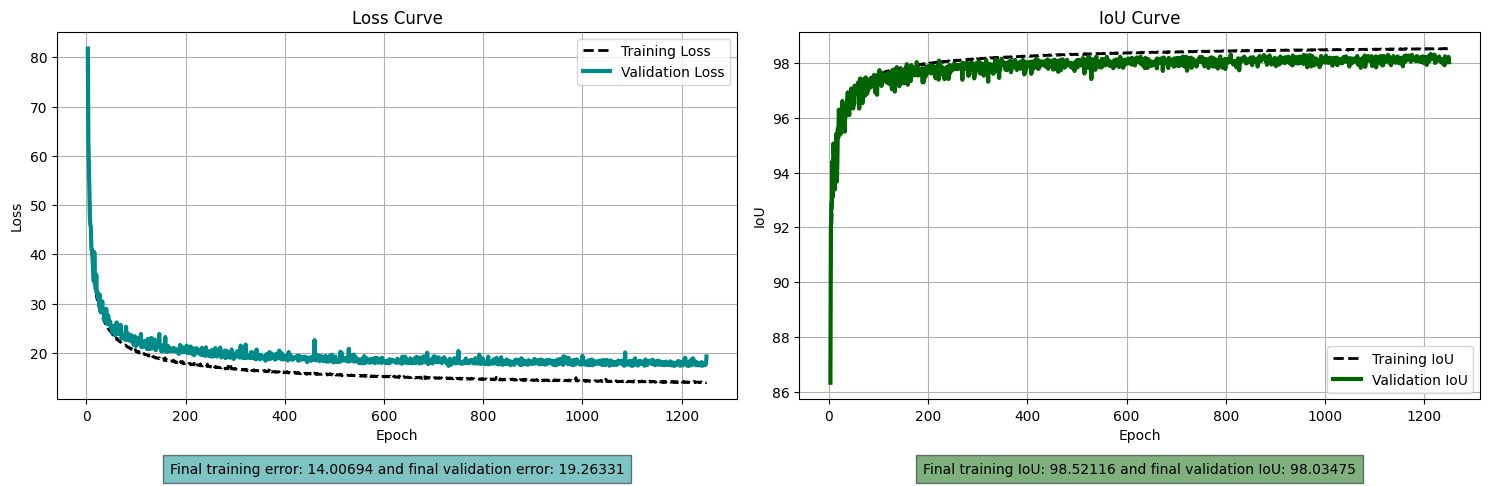

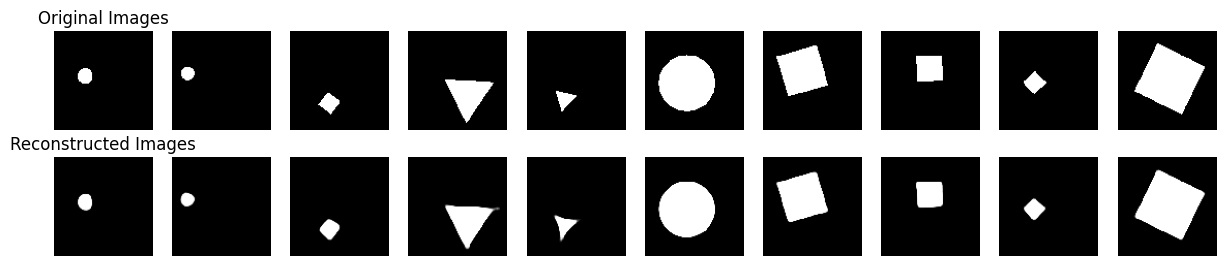

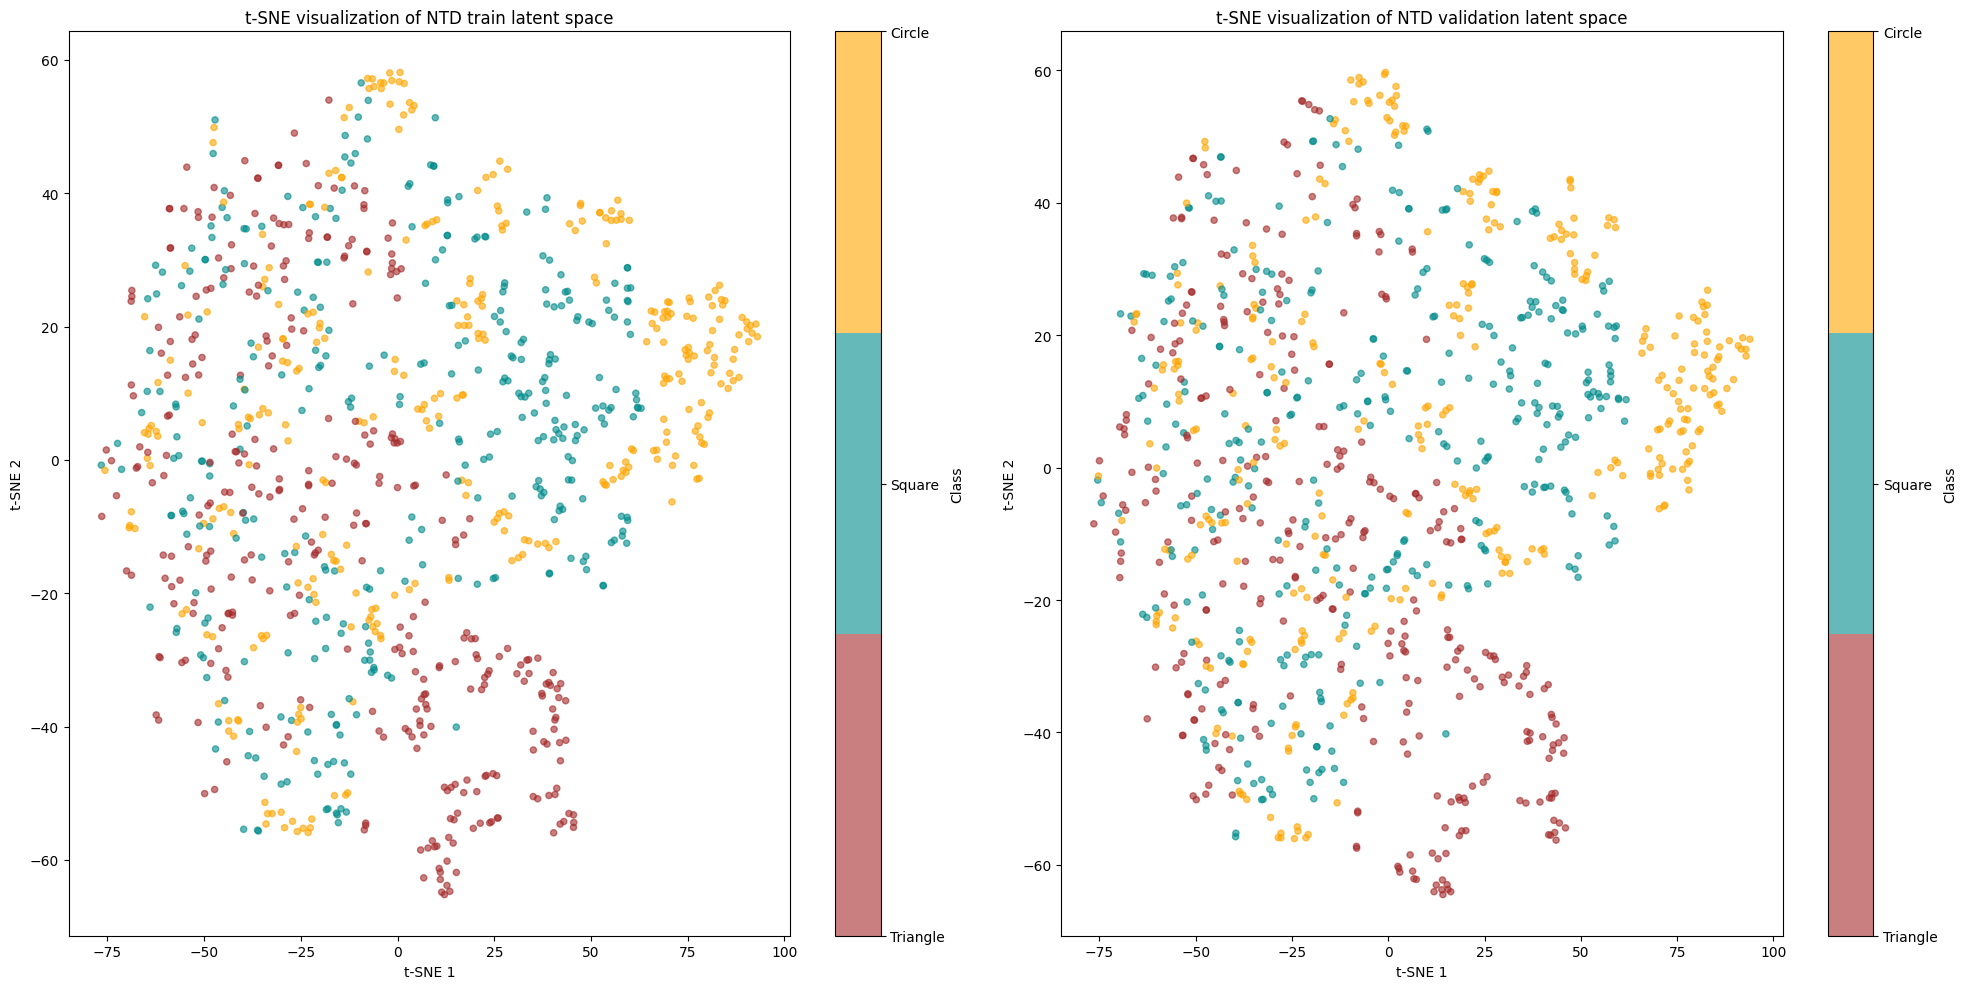

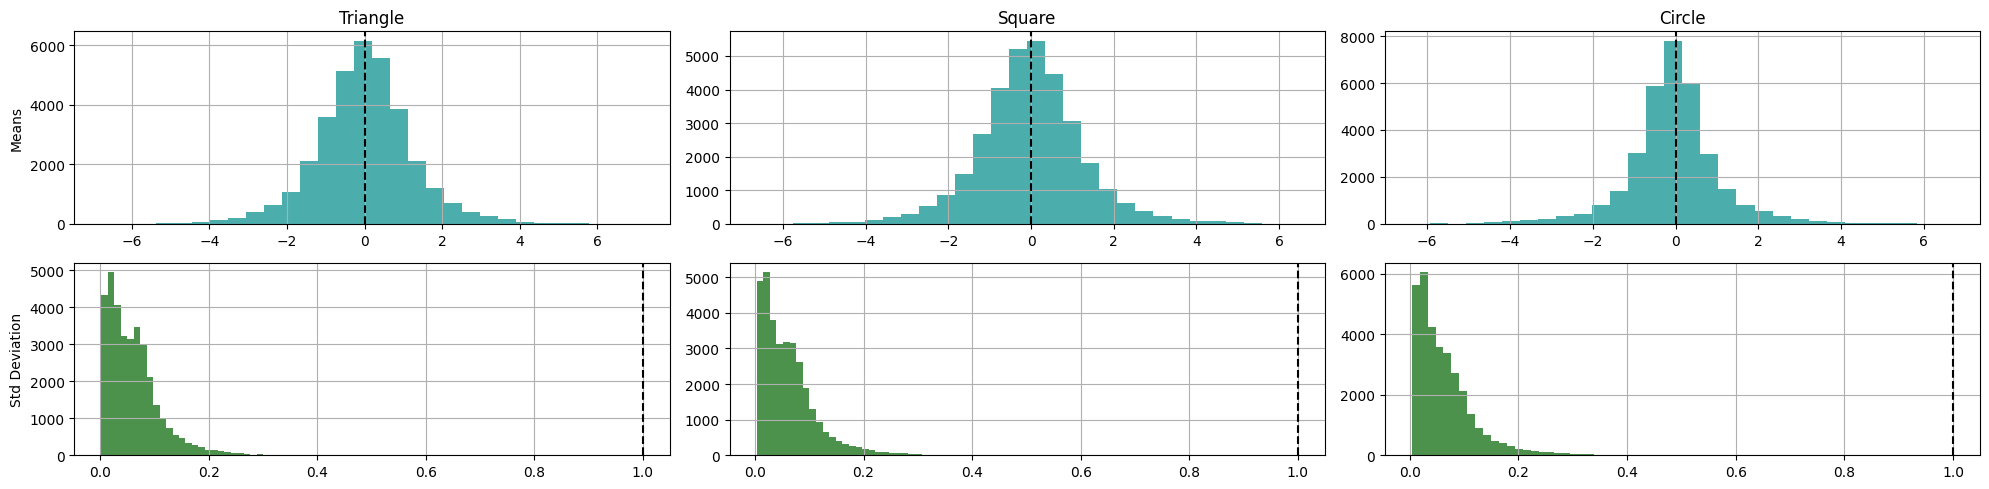

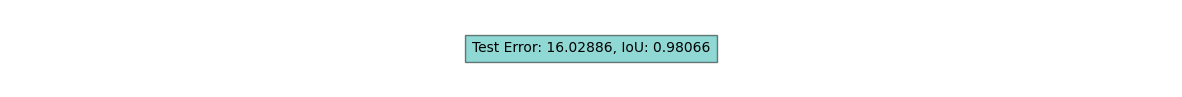

CPU times: user 1min 5s, sys: 820 ms, total: 1min 6s
Wall time: 49.3 s


In [5]:
%%time
set_seed()
vae3 = Geometric_VAE_NTD(rank=[16, 16, 100], train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae3)
vae3.load_and_plot('Models/GeometricShapes/ntd.pth', train_loader, val_loader) # coef=10**-2
vae3.test(test_loader, coef=0)

### mVAE-CPD-NN

Number of parameters: 335016 (-20.04%)
Model loaded from Models/GeometricShapes/mcpd_nn.pth


<IPython.core.display.Latex object>

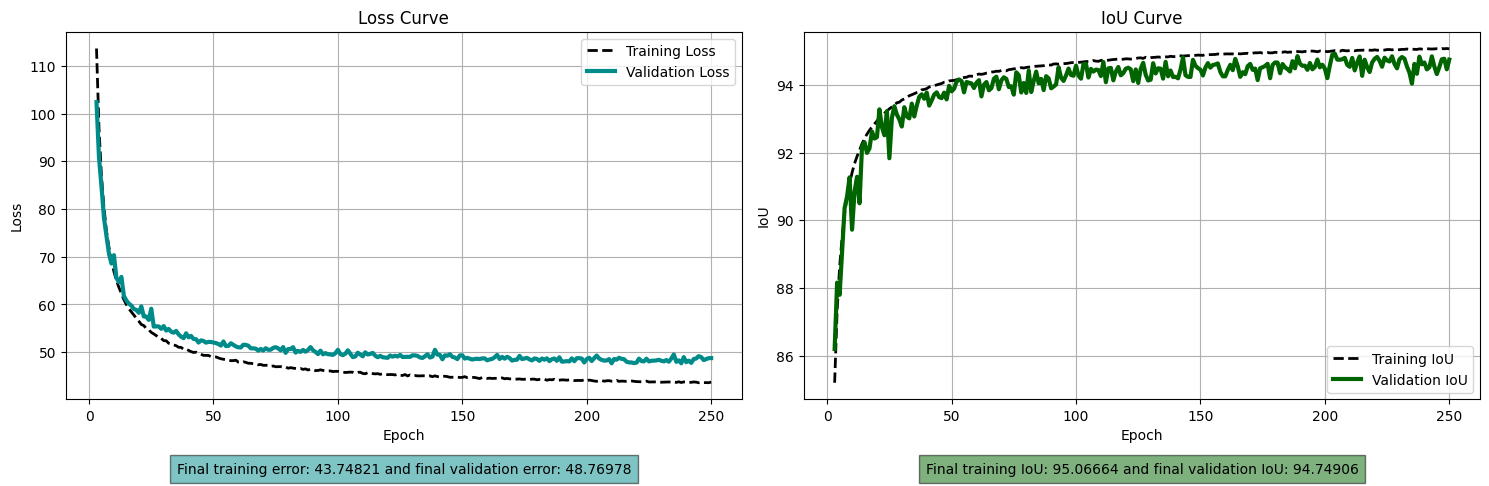

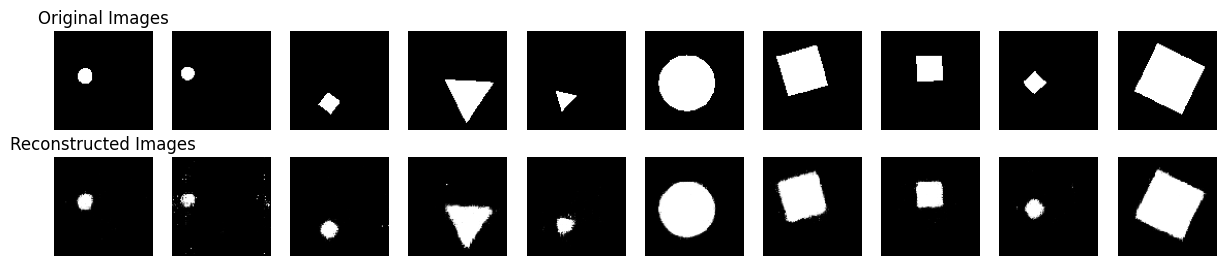

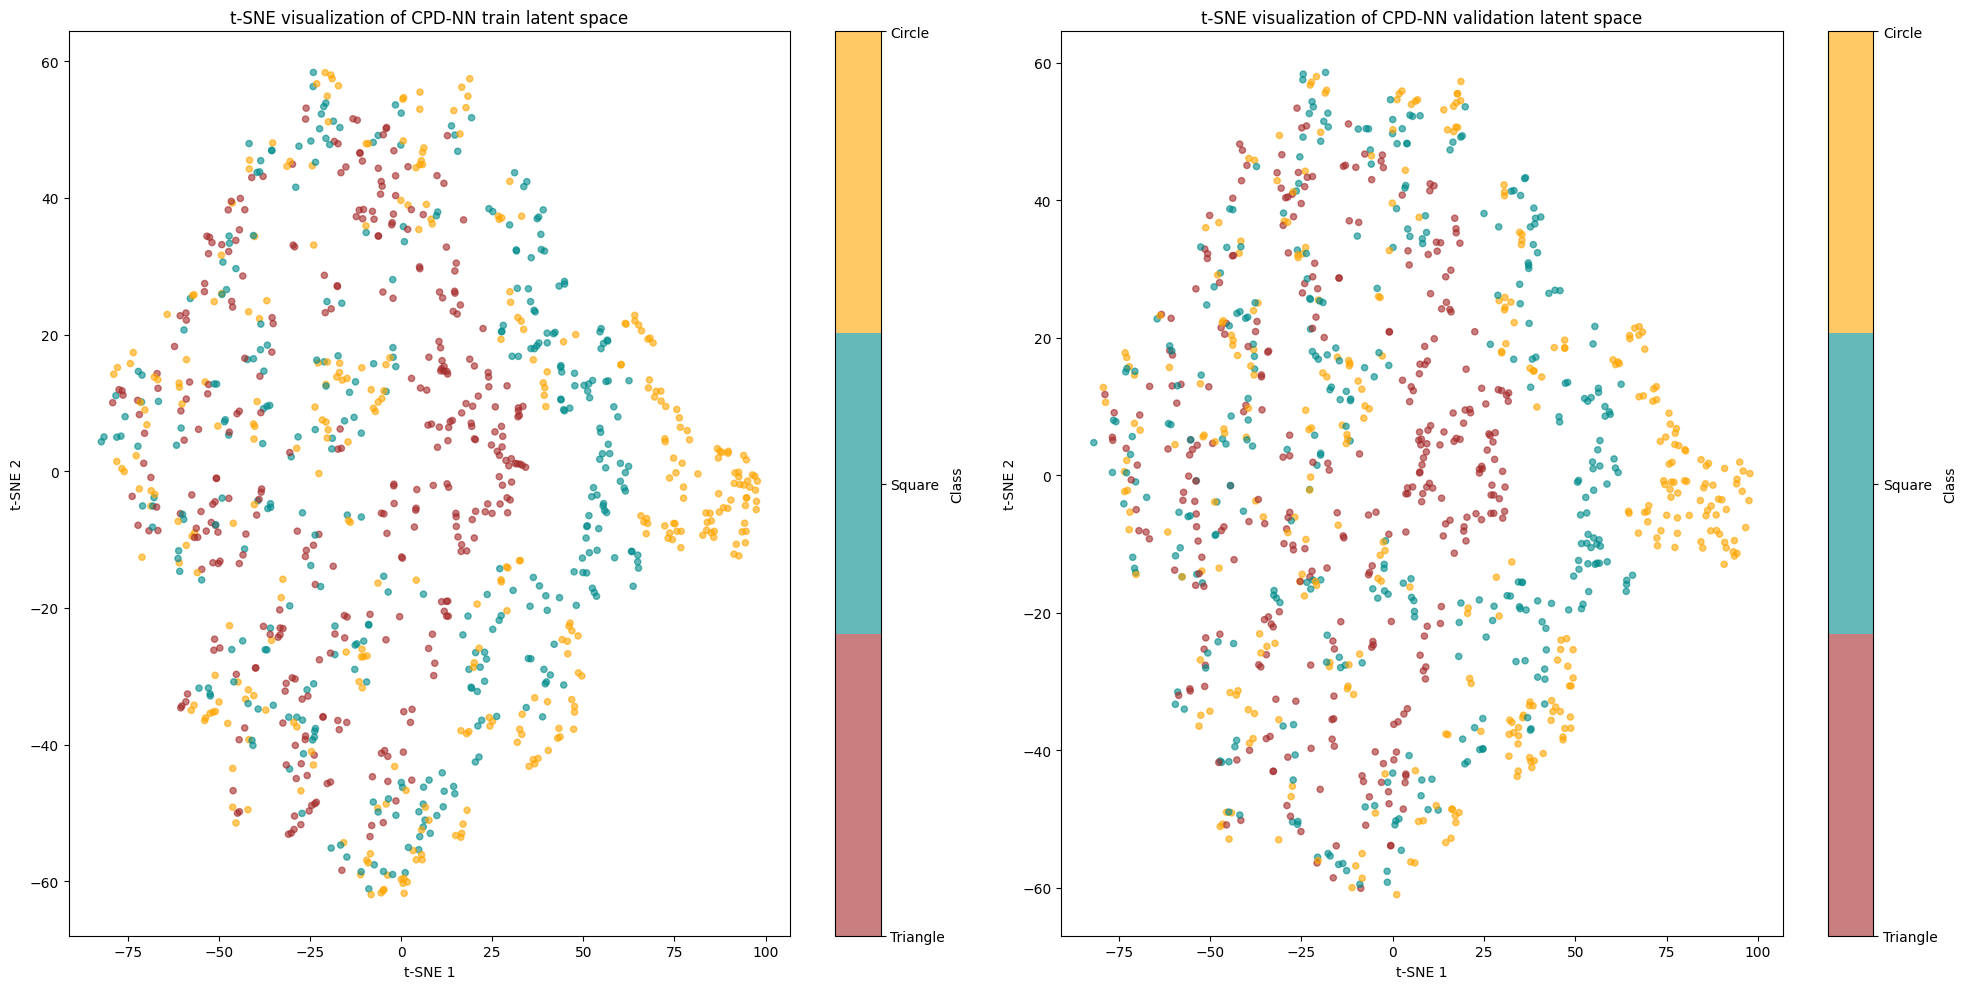

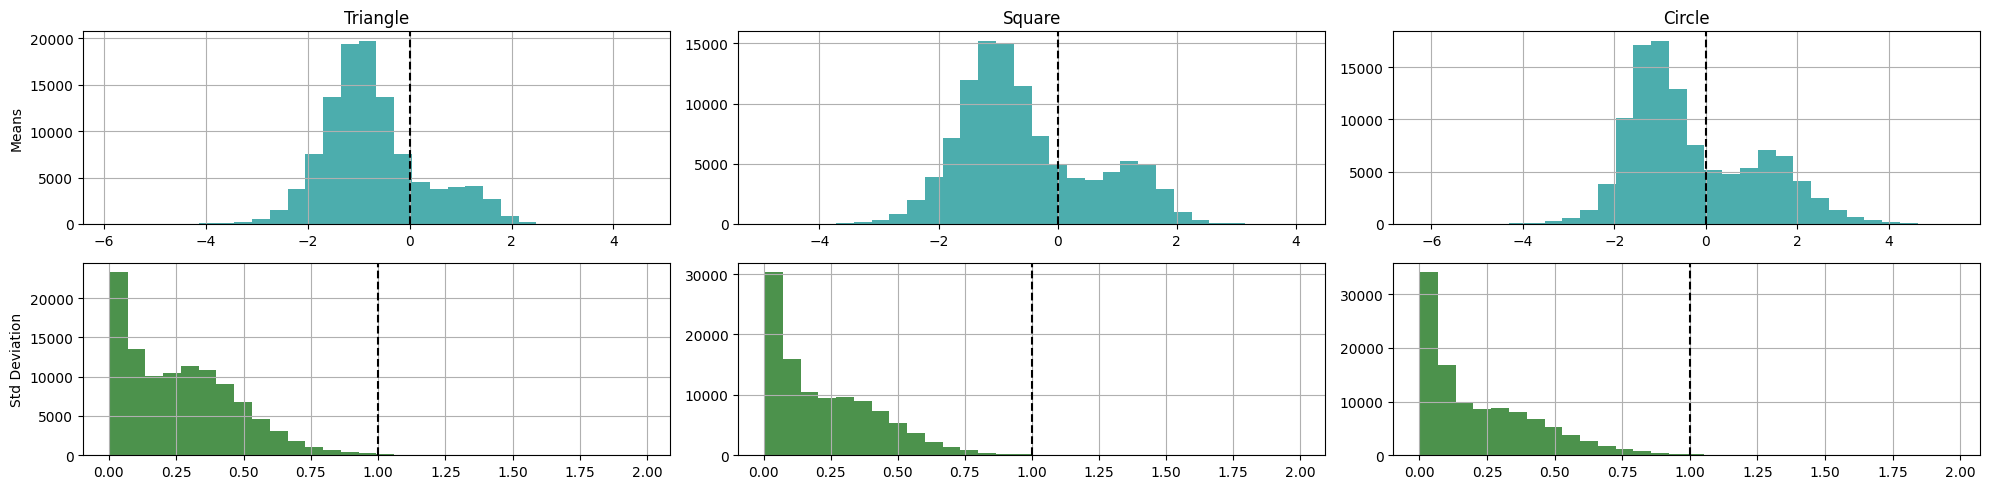

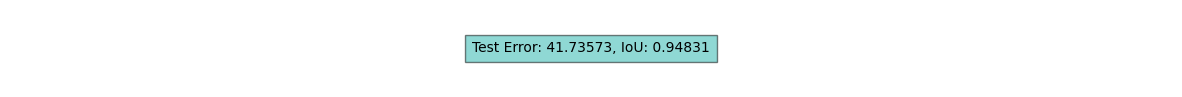

CPU times: user 1min 2s, sys: 1.22 s, total: 1min 4s
Wall time: 48.8 s


In [6]:
%%time
set_seed()
vae4m = Geometric_VAE_CPD_NN(rank=324, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Matrices')
reduction(vae1, vae4m)
vae4m.load_and_plot('Models/GeometricShapes/mcpd_nn.pth', train_loader, val_loader) # coef=10**-2
vae4m.test(test_loader, coef=0)

### sVAE-CPD-NN

Number of parameters: 272808 (-34.89%)
Model loaded from Models/GeometricShapes/scpd_nn.pth


<IPython.core.display.Latex object>

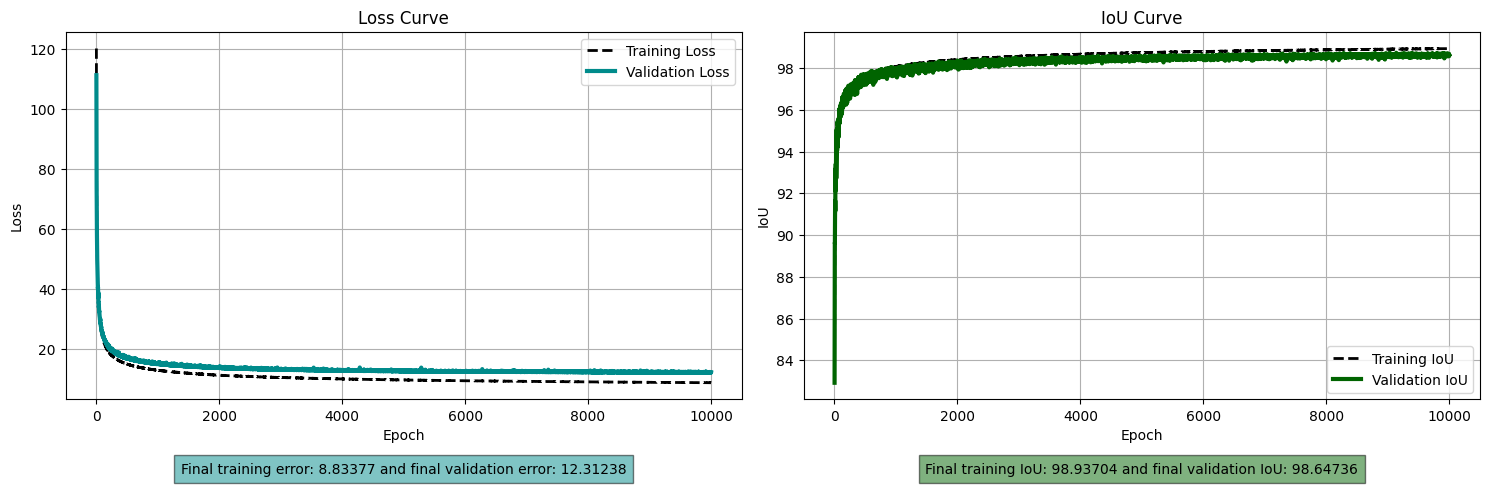

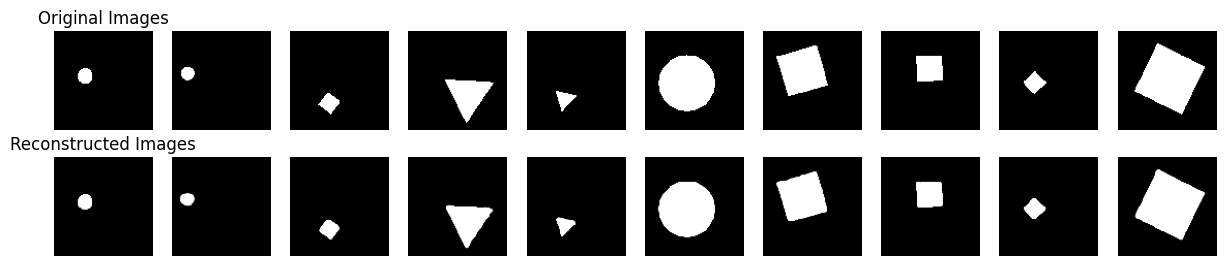

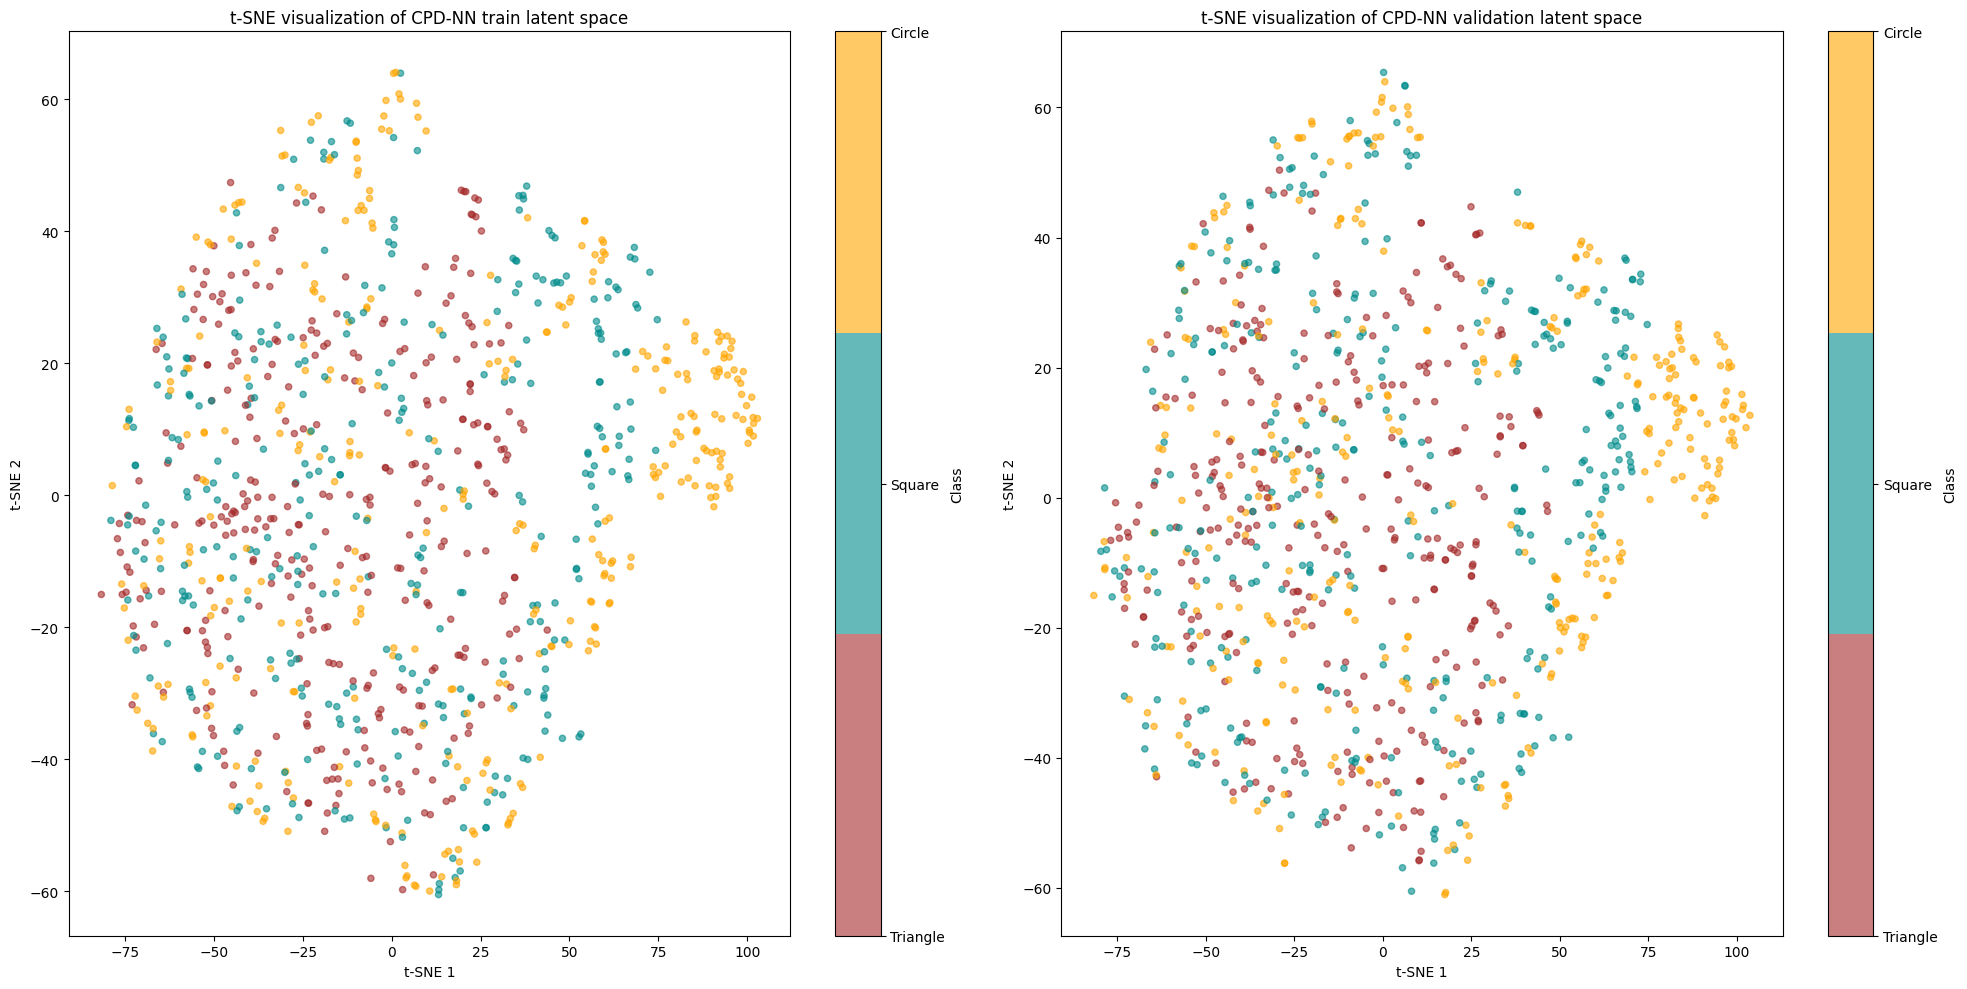

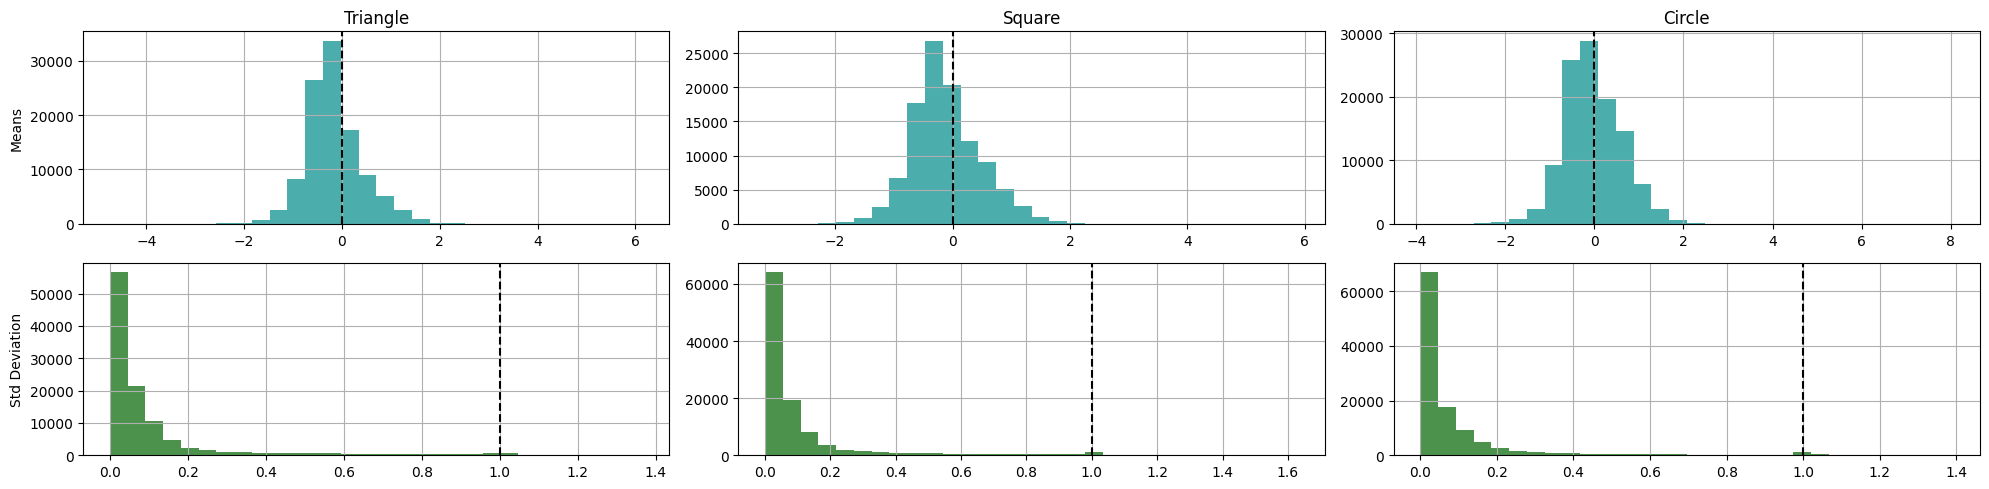

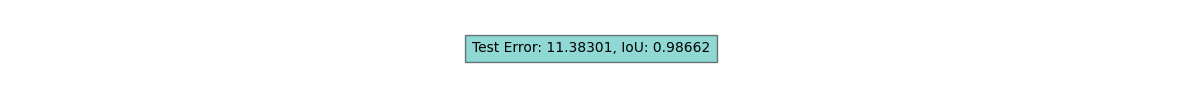

CPU times: user 1min 17s, sys: 1.13 s, total: 1min 18s
Wall time: 58.5 s


In [7]:
%%time
set_seed()
vae4s = Geometric_VAE_CPD_NN(rank=324, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Symmetric')
reduction(vae1, vae4s)
vae4s.load_and_plot('Models/GeometricShapes/scpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4s.test(test_loader, coef=0)

## Classification

### Classic VAE

Model loaded from Models/GeometricShapes/classic_cl.pth


<IPython.core.display.Latex object>

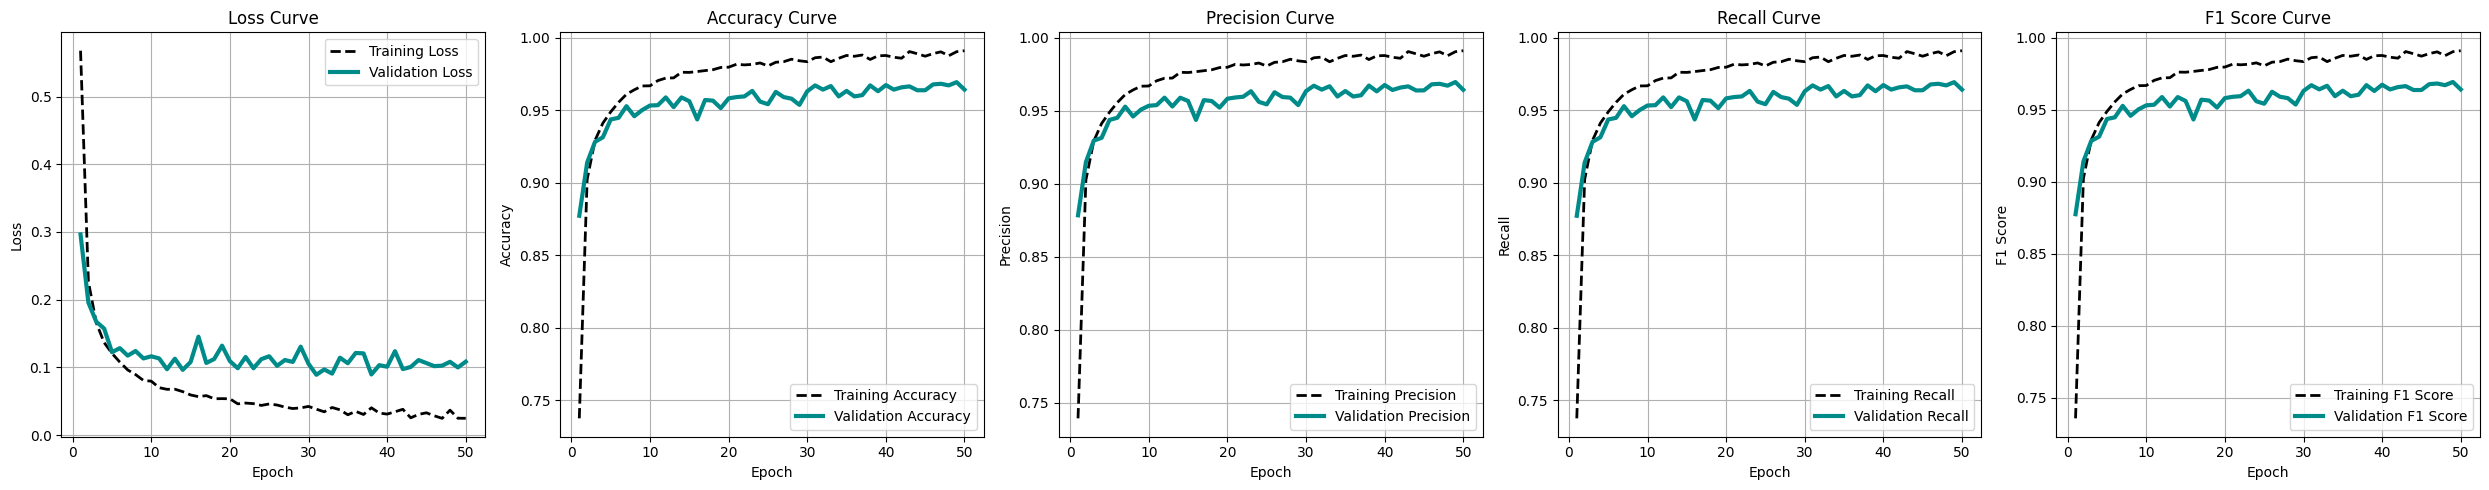

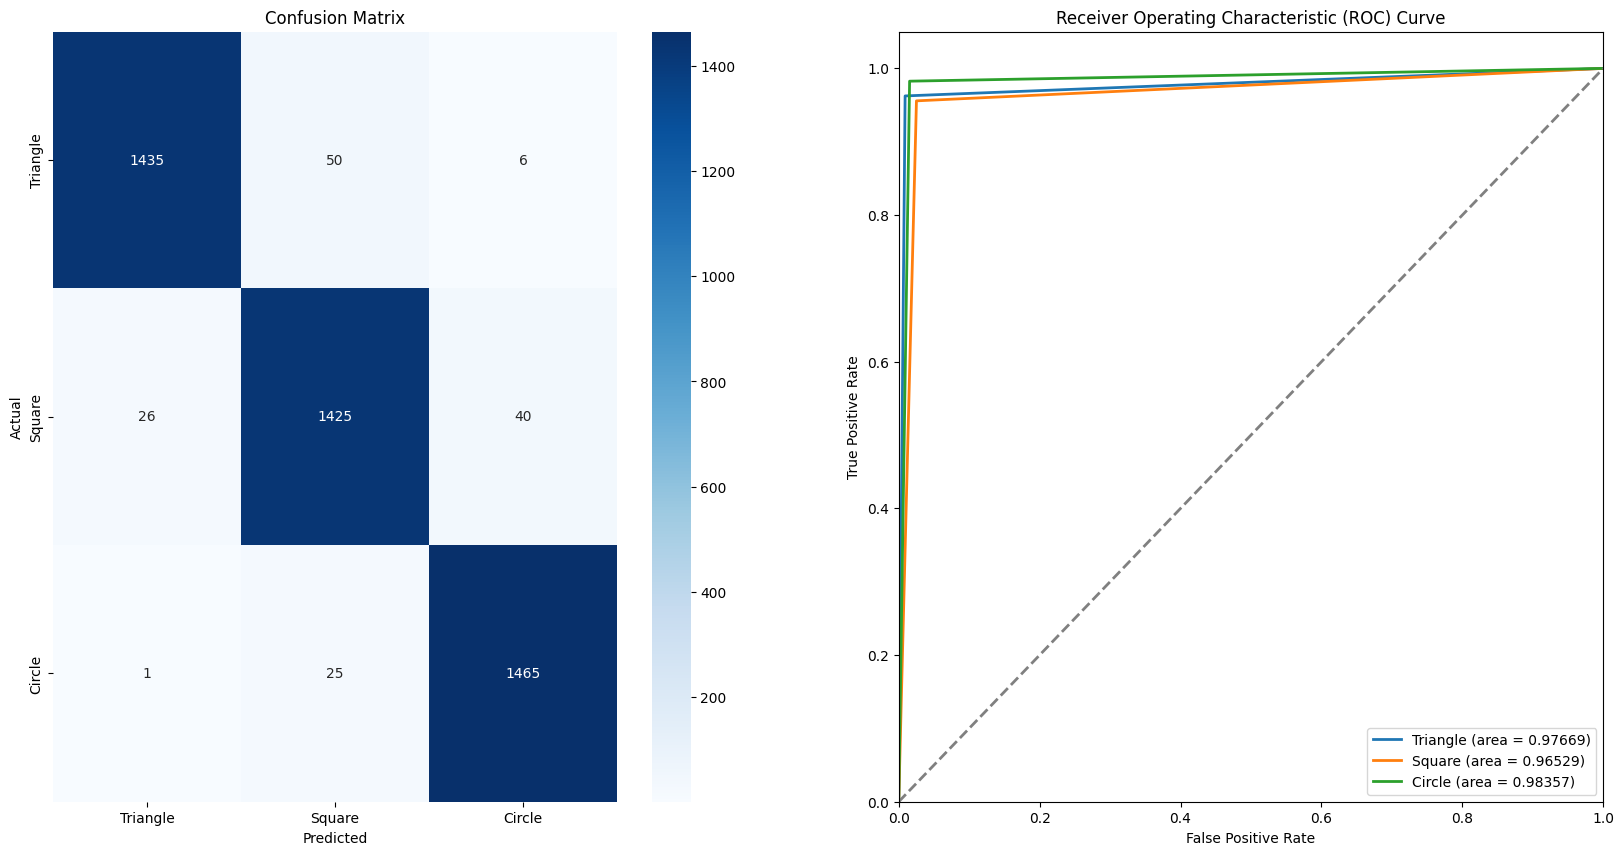

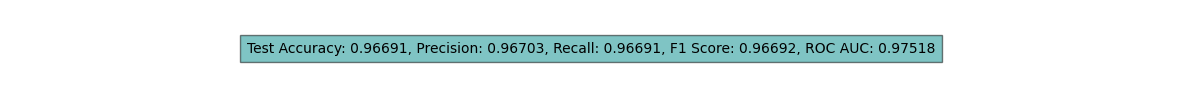

CPU times: user 6.74 s, sys: 190 ms, total: 6.93 s
Wall time: 5.85 s


In [8]:
%%time
set_seed()
cl1 = Classifier(vae1, dataset='Geometric Shapes', num_classes=3)
cl1.load_and_plot('Models/GeometricShapes/classic_cl.pth', test_loader)

### VAE-NTD

Model loaded from Models/GeometricShapes/ntd_cl.pth


<IPython.core.display.Latex object>

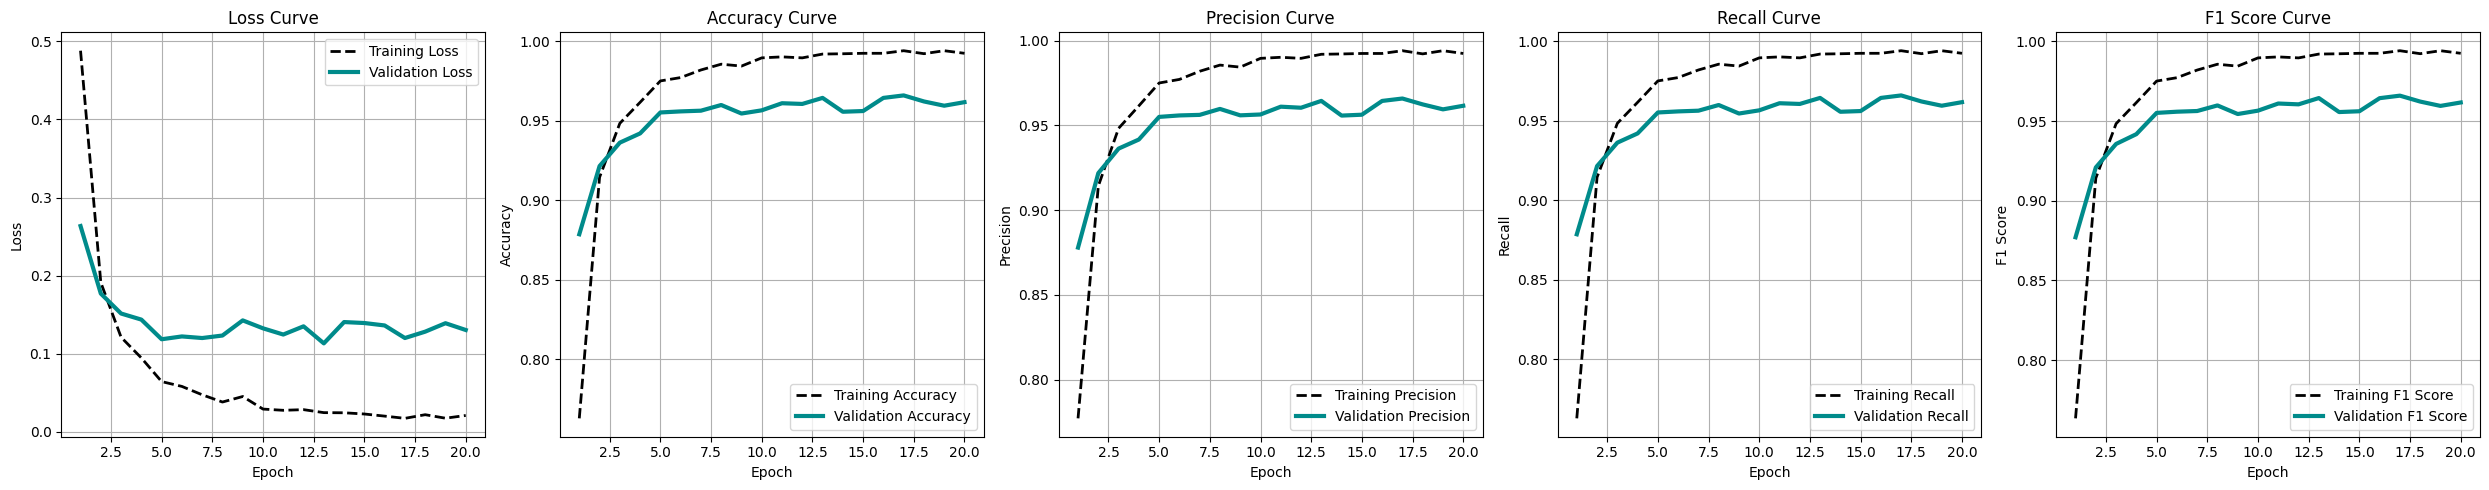

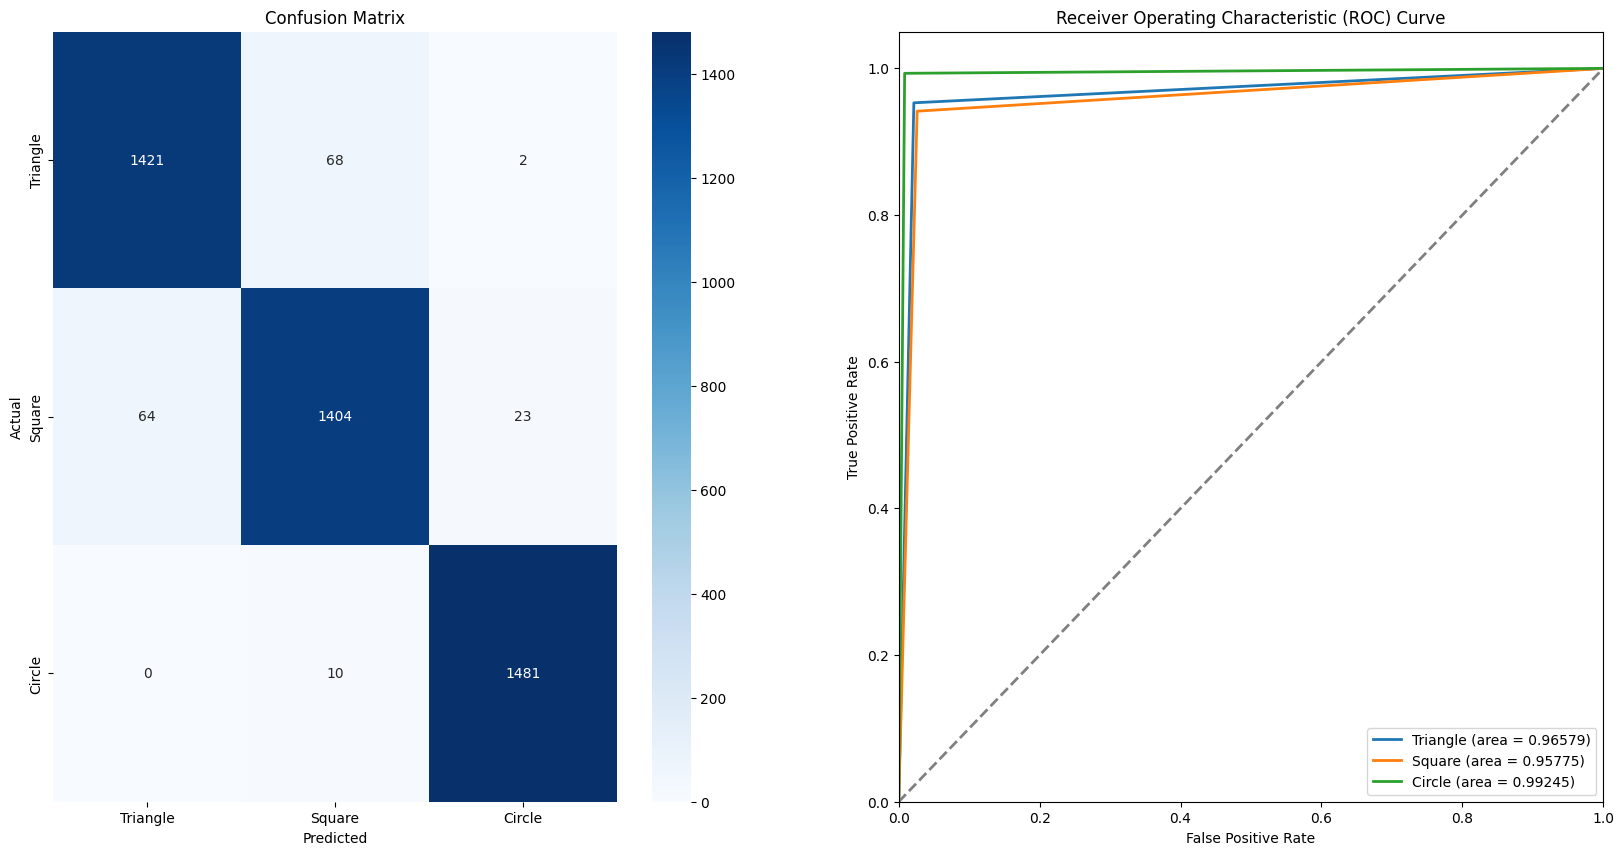

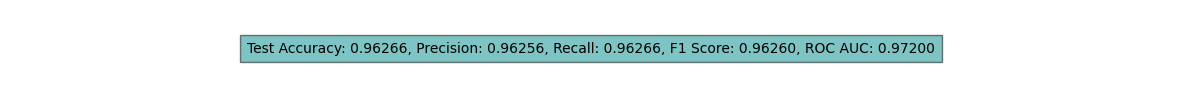

CPU times: user 6.54 s, sys: 235 ms, total: 6.78 s
Wall time: 5.52 s


In [9]:
%%time
set_seed()
cl3 = Classifier(vae3, dataset='Geometric Shapes', input_dim=100, num_classes=3)
cl3.load_and_plot('Models/GeometricShapes/ntd_cl.pth', test_loader)

### mVAE-CPD-NN

Model loaded from Models/GeometricShapes/mcpd_nn_cl.pth


<IPython.core.display.Latex object>

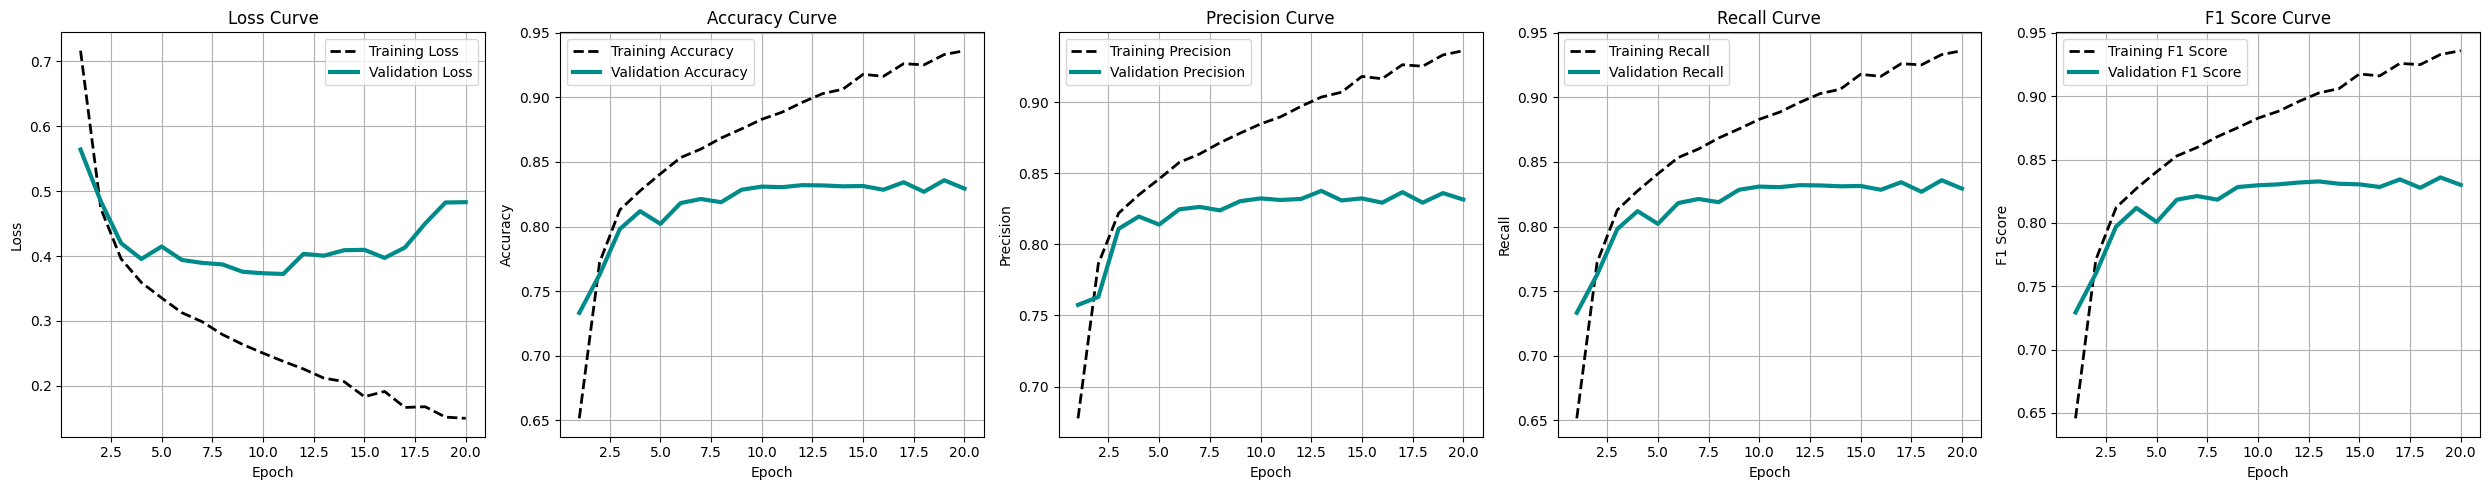

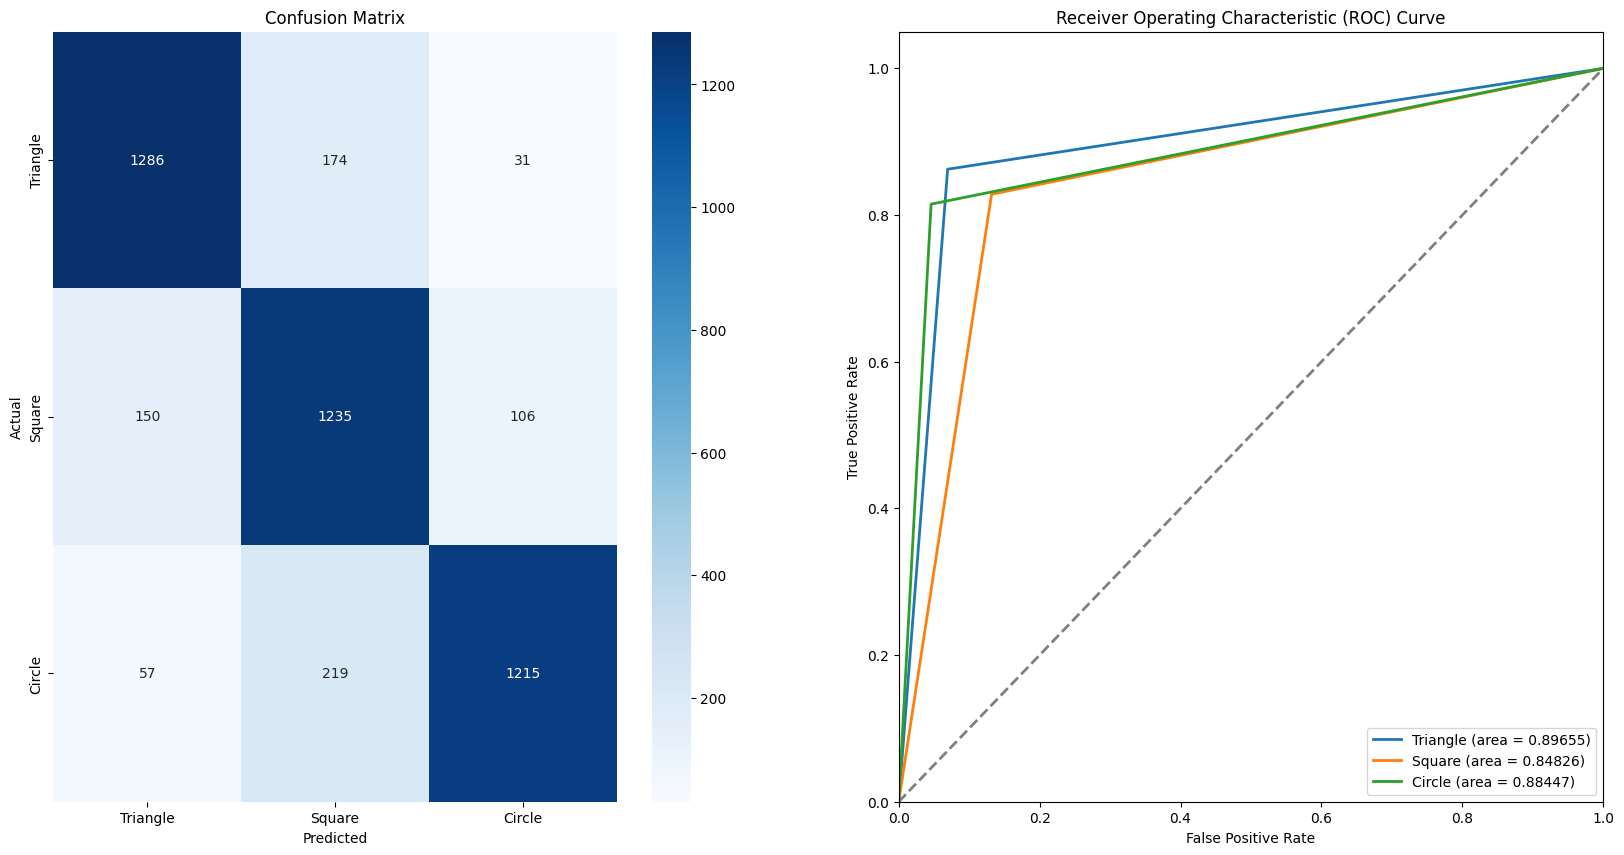

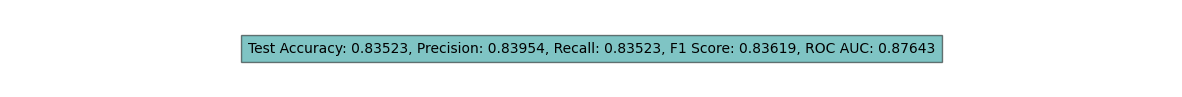

CPU times: user 5.58 s, sys: 257 ms, total: 5.84 s
Wall time: 4.79 s


In [10]:
%%time
set_seed()
cl4m = Classifier(vae4m, dataset='Geometric Shapes', input_dim=324, num_classes=3)
cl4m.load_and_plot('Models/GeometricShapes/mcpd_nn_cl.pth', test_loader)

### sVAE-CPD-NN

Model loaded from Models/GeometricShapes/scpd_nn_cl.pth


<IPython.core.display.Latex object>

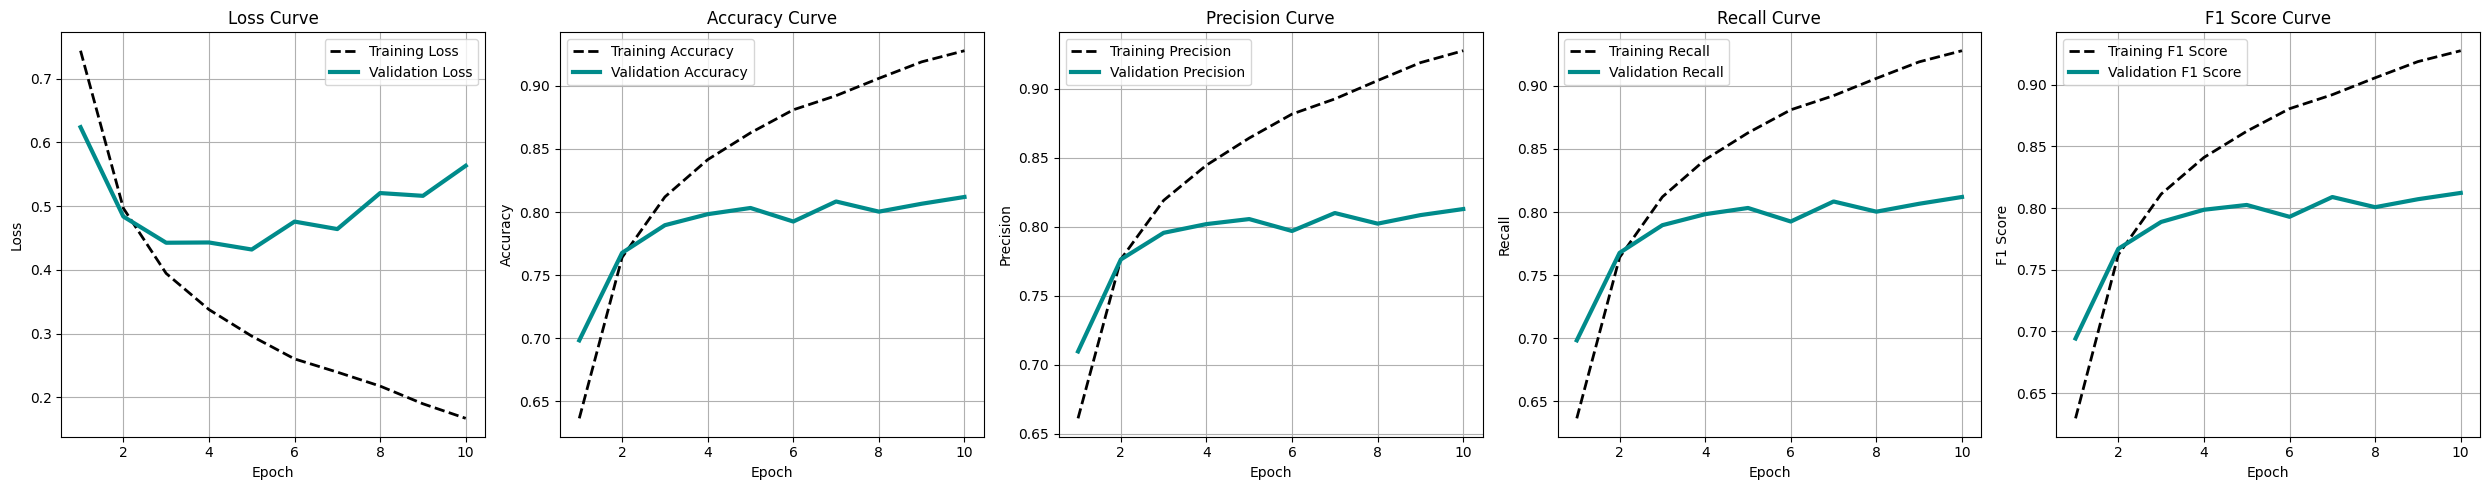

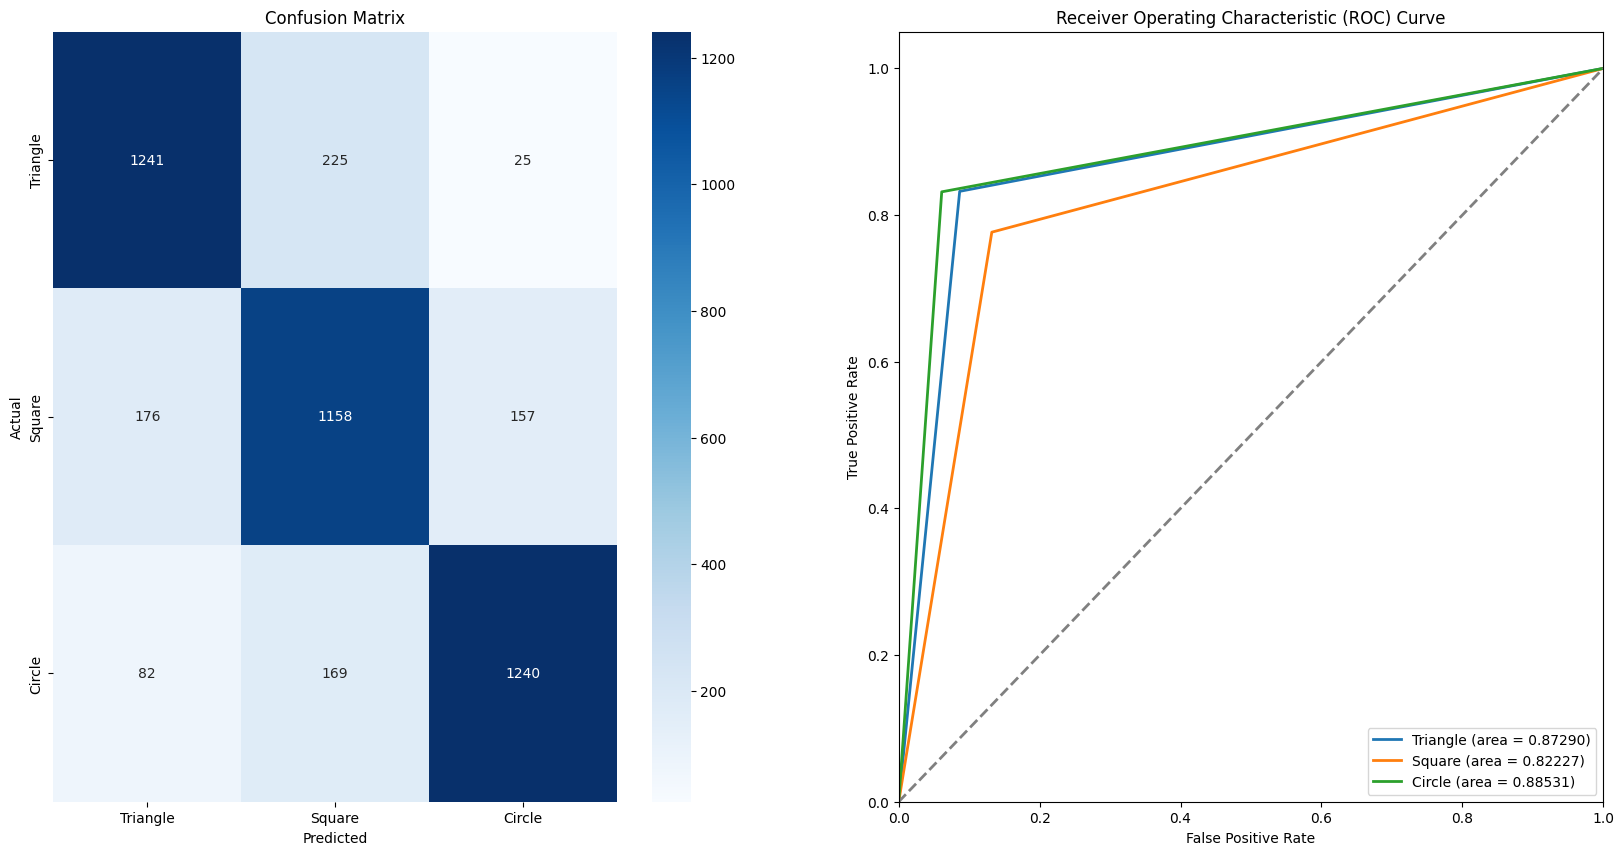

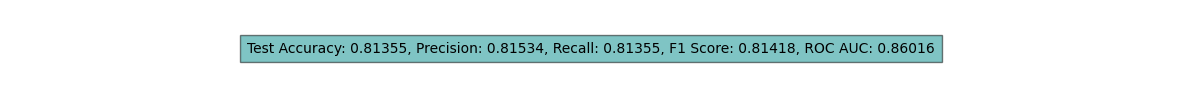

CPU times: user 14.4 s, sys: 261 ms, total: 14.7 s
Wall time: 10.1 s


In [11]:
%%time
set_seed()
cl4s = Classifier(vae4s, dataset='Geometric Shapes', input_dim=324, num_classes=3)
cl4s.load_and_plot('Models/GeometricShapes/scpd_nn_cl.pth', test_loader)